In [2]:
import gym
import time
import matplotlib.pyplot as plt
from pyswip import Prolog
import IPython.display as display
from minihack import LevelGenerator
from minihack import RewardManager
from minihack.reward_manager import SequentialRewardManager
import random
from nle import nethack
from nle.nethack import Command
import numpy as np

#print(dir(minihack))

In [56]:
from nle.env.base import FULL_ACTIONS
from nle import _pynethack, nethack

MH_FULL_ACTIONS = list(FULL_ACTIONS)
MH_FULL_ACTIONS.remove(nethack.MiscDirection.UP)
actions = tuple(MH_FULL_ACTIONS)
print(actions)
for action in actions:
    print(action)

(<CompassDirection.N: 107>, <CompassDirection.E: 108>, <CompassDirection.S: 106>, <CompassDirection.W: 104>, <CompassDirection.NE: 117>, <CompassDirection.SE: 110>, <CompassDirection.SW: 98>, <CompassDirection.NW: 121>, <CompassDirectionLonger.N: 75>, <CompassDirectionLonger.E: 76>, <CompassDirectionLonger.S: 74>, <CompassDirectionLonger.W: 72>, <CompassDirectionLonger.NE: 85>, <CompassDirectionLonger.SE: 78>, <CompassDirectionLonger.SW: 66>, <CompassDirectionLonger.NW: 89>, <MiscDirection.DOWN: 62>, <MiscDirection.WAIT: 46>, <MiscAction.MORE: 13>, <Command.ADJUST: 225>, <Command.APPLY: 97>, <Command.ATTRIBUTES: 24>, <Command.CALL: 67>, <Command.CAST: 90>, <Command.CHAT: 227>, <Command.CLOSE: 99>, <Command.DIP: 228>, <Command.DROP: 100>, <Command.DROPTYPE: 68>, <Command.EAT: 101>, <Command.ENGRAVE: 69>, <Command.ENHANCE: 229>, <Command.ESC: 27>, <Command.FIGHT: 70>, <Command.FIRE: 102>, <Command.FORCE: 230>, <Command.INVENTORY: 105>, <Command.INVENTTYPE: 73>, <Command.INVOKE: 233>, <Co

In [57]:
from minihack.base import MH_DEFAULT_OBS_KEYS
MH_DEFAULT_OBS_KEYS

['glyphs',
 'chars',
 'colors',
 'specials',
 'glyphs_crop',
 'chars_crop',
 'colors_crop',
 'specials_crop',
 'blstats',
 'message']

In [58]:
COMESTIBLES_ACTIONS ={
    'apple': [Command.EAT],
    'orange': [Command.EAT],
    'banana': [Command.EAT],
    'pear': [Command.EAT],
    'melon': [Command.EAT],
    'candy bar': [Command.EAT],
    'meatball': [Command.EAT],
    'eucalyptus leaf': [Command.EAT],
    'egg': [Command.EAT],
    'carrot': [Command.EAT]
    }

MONSTERS_ACTIONS = {
    'koblod': [Command.FIGHT]
}



COMESTIBLES = set(COMESTIBLES_ACTIONS.keys())
print(COMESTIBLES)

N_COMESTIBLES = 10

def generate_sequence(source_dict:dict, len_seq:int, with_duplicates=False) -> list:
    keys = list(source_dict.keys())
    sequence = []
    if with_duplicates:
        sequence = random.choices(keys, k=len_seq)
    else:
        sequence = random.sample(keys, k=len_seq)
    return sequence

goal_sequence = generate_sequence(COMESTIBLES_ACTIONS, 3, with_duplicates=False)
print(goal_sequence)

{'orange', 'candy bar', 'apple', 'carrot', 'meatball', 'pear', 'melon', 'egg', 'banana', 'eucalyptus leaf'}
['orange', 'melon', 'meatball']


In [3]:
SEED = 1

lvl = LevelGenerator(w=10, h=10)
i = 0
'''
for item in COMESTIBLES:
    lvl.add_object(name=item, symbol='%', place=(0, i))
    print(f"Adding object: {item}")
    i += 1
'''
#lvl.add_object(name='apple', symbol='%', place=(0, 1))
#lvl.add_object(name='dagger', symbol=')', place=(0, 2))
#lvl.add_object(name='amulet of change', symbol='"', place=(0, 3))
#lvl.add_object(name='leather armor', symbol='[', place=(0, 4))
#lvl.add_monster(name='minotaur', place=(0, 5), args=['asleep'])
lvl.add_terrain(coord=(2,2), flag=' ')
lvl.add_gold(amount=10, place = (0, 5))
lvl.add_monster(name='leprechaun', place=(1, 7), args=['awake', 'hostile'])

lvl.add_goal_pos()
#lvl.set_start_pos((0,0))

des_file = lvl.get_des()
print(des_file)

my_reward_manager = SequentialRewardManager()

'''
for item in goal_sequence:
    my_reward_manager.add_eat_event(name=item, reward=1)
'''
my_reward_manager.add_eat_event(name='apple', reward=1)
#my_reward_manager.add_amulet_event(reward=1)
#my_reward_manager.add_wear_event(name='leather armor', reward=1)
#my_reward_manager.add_wield_event(name='dagger', reward=1)
#my_reward_manager.add_kill_event(name='minotaur', reward=1)


'''
for item in COMESTIBLES:
    if item not in goal_sequence:
        my_reward_manager.add_eat_event(name=item, reward=0)
'''

env = gym.make('MiniHack-Navigation-Custom-v0',
               character='sam-hum-neu-mal',
               observation_keys=('screen_descriptions','inv_strs','blstats','message','chars', 'pixel', 'glyphs'),
               des_file=des_file)#, reward_manager=my_reward_manager)

env.seed(SEED)
#game_map = lvl.get_map_array()
#print(list(game_map))
#np.where(game_map == ord('%'))
#print(state['chars'])
#print(repr(env.actions))

#print(f'Action performed: {repr(env.actions[action_id])}')


print(env.actions)


MAZE: "mylevel", ' '
FLAGS:hardfloor
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
..........
..........
.. .......
..........
..........
..........
..........
..........
..........
..........
ENDMAP
REGION:(0,0,10,10),lit,"ordinary"
GOLD: 10,(0, 5)
MONSTER:"leprechaun",(1, 7),awake,hostile
STAIR:random,down

(<CompassDirection.N: 107>, <CompassDirection.E: 108>, <CompassDirection.S: 106>, <CompassDirection.W: 104>, <CompassDirection.NE: 117>, <CompassDirection.SE: 110>, <CompassDirection.SW: 98>, <CompassDirection.NW: 121>)


In [176]:
i = 0
for action in env.actions:
    print(str(i) + ') ' + str(action))
    i += 1

0) CompassDirection.N
1) CompassDirection.E
2) CompassDirection.S
3) CompassDirection.W
4) CompassDirection.NE
5) CompassDirection.SE
6) CompassDirection.SW
7) CompassDirection.NW


In [8]:
env.seed(core=SEED, disp=SEED, reseed=True)
initial_state = env.reset()
#print(type(env))
for i in range(0,10):
    for j in range(0,10):
        print(env.get_screen_description(i,j))
#env.render()
states = []
messages = bytes(initial_state['message']).decode('utf-8').rstrip('\x00') + '\n'
actions = [29, 2, 29, 2, 29, 2, 29, 2, 29, 2, 29, 2, 29, 2, 29, 2, 29, 2, 29]

for action in actions:
    state, reward, done, info = env.step(action)
    message = bytes(state['message']).decode('utf-8').rstrip('\x00')
    if message != '': messages += (message + '\n')
    if action == 29:
        food_char = message.split('[')[1][0]
        action2 = env.actions.index(ord(food_char))
        state, reward, done, info = env.step(action2)
    states.append(state)
    '''print("Action:", env.actions[action])
    print("Reward:", reward)
    print("Done:", done)
    print("Info:", info)
    print("")
    print(np.where(state['chars'] == ord('@')))

    if done:
        print("Episode done.")
        break'''





































































































There are 2 bananas here; eat one? [ynq] (n) 
You see here a carrot.
There is a carrot here; eat it? [ynq] (n) 
You see here an egg.
There is an egg here; eat it? [ynq] (n) 
You see here a candy bar.
There is a candy bar here; eat it? [ynq] (n) 
You see here an apple.
There is an apple here; eat it? [ynq] (n) 
You see here a meatball.
There is a meatball here; eat it? [ynq] (n) 
You see here a melon.
There is a melon here; eat it? [ynq] (n) 
You see here a eucalyptus leaf.
There is a eucalyptus leaf here; eat it? [ynq] (n) 
You see here 2 pears.
There are 2 pears here; eat one? [ynq] (n) 
You see here an orange.
There is an orange here; eat it? [ynq] (n) 


In [4]:
env.seed(core=SEED, disp=SEED, reseed=True)
initial_state = env.reset()
states = []
messages = bytes(initial_state['message']).decode('utf-8').rstrip('\x00') + '\n'

In [5]:
ACTION = 'north'

actions = {
    'wait': 17,
    'south': 2,
    'north': 0,
    'eat': 29,
    'wear': 77,
    'wield': 78,
    'fight': 33,
    'pickup': 49,
    'throw': 71
}

state, reward, done, info = env.step(actions[ACTION])
message = bytes(state['message']).decode('utf-8').rstrip('\x00')
print(message)
if message != '': messages += (message + '\n')
else: messages += ('_' + '\n')

In [74]:
state, reward, done, info = env.step(2)#env.actions.index(ord('f')))
message = bytes(state['message']).decode('utf-8').rstrip('\x00')
print(message)
if message != '': messages += (message + '\n')
else: messages += ('_' + '\n')

The dagger misses the leprechaun.


In [54]:
#inventory = bytes(state['inv_strs']).decode('utf-8').rstrip('\x00')
#print(inventory)
# blstats:
# strength_percentage, strength, dexterity, constitution, intelligence,
# wisdom, charisma, score, hitpoints, max_hitpoints, depth, gold,
# energy, max_energy, armor_class, monster_level, experience_level,
# experience_points, time, hunger_state, carrying_capacity,
# dungeon_number, and level_number
print(len(state['blstats']))
STATS = ['strength_percentage', 'strength', 'dexterity', 'constitution', 'intelligence',
    'wisdom', 'charisma', 'score', 'hitpoints', 'max_hitpoints', 'depth', 'gold',
    'energy', 'max_energy', 'armor_class', 'monster_level', 'experience_level',
    'experience_points', 'time', 'hunger_state', 'carrying_capacity',
    'dungeon_number', 'level_number']
print(len(STATS))
print(list(state['blstats']))
utils.print_stats(state['blstats'])

27
23
[41, 7, 18, 18, 16, 18, 8, 12, 7, 0, 15, 15, 1, 0, 2, 2, 4, 0, 1, 0, 6, 1, 0, 0, 1, 0, 1]
x: 41
y: 7
strength_percentage: 18
strength: 18
dexterity: 16
constitution: 18
intelligence: 8
wisdom: 12
charisma: 7
score: 0
hitpoints (health): 15
max_hitpoints: 15
depth: 1
gold: 0
energy: 2
max_energy: 2
armor_class: 4
monster_level: 0
experience_level: 1
experience_points: 0
time: 6
hunger_state: 1
carrying_capacity: 0
dungeon_number: 0
level_number: 1


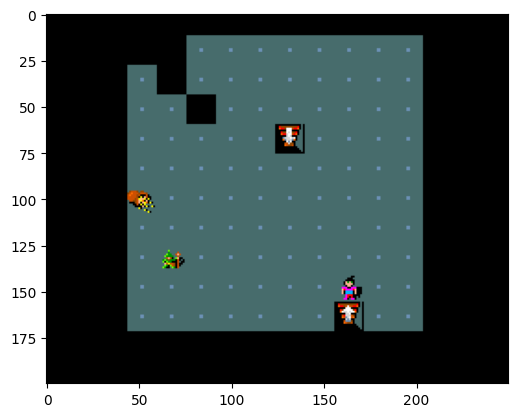

In [6]:
image = plt.imshow(state['pixel'][100:300, 500:750])
for state in states:
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(np.array(state['pixel'])[100:300, 500:750])

In [155]:
print(info)

{'end_status': <StepStatus.RUNNING: 0>, 'is_ascended': False}


In [7]:
char_matrix = state['chars']

non_empty_rows = ~np.all(char_matrix == 32, axis=1)
non_empty_cols = ~np.all(char_matrix == 32, axis=0)

char_matrix_map = char_matrix[non_empty_rows][:, non_empty_cols]

s = ''
for a in char_matrix_map:
    for c in a:
        s = s+chr(c)
    s = s+'\n'
print(s)

print(char_matrix_map)

  ........
. ........
.. .......
.....>....
..........
$.........
..........
.l........
.......@..
.......<..

[[ 32  32  46  46  46  46  46  46  46  46]
 [ 46  32  46  46  46  46  46  46  46  46]
 [ 46  46  32  46  46  46  46  46  46  46]
 [ 46  46  46  46  46  62  46  46  46  46]
 [ 46  46  46  46  46  46  46  46  46  46]
 [ 36  46  46  46  46  46  46  46  46  46]
 [ 46  46  46  46  46  46  46  46  46  46]
 [ 46 108  46  46  46  46  46  46  46  46]
 [ 46  46  46  46  46  46  46  64  46  46]
 [ 46  46  46  46  46  46  46  60  46  46]]


In [15]:
GOLD_CHAR = 36
LEPRECHAUN_CHAR = 108
AGENT_CHAR = 64

def agent_pos():
    x, y = np.where(char_matrix_map == AGENT_CHAR)
    return x, y

def gold_pos():
    xs, ys = np.where(char_matrix_map == GOLD_CHAR)
    return xs, ys

agent_x, agent_y = np.array(agent_pos())
gold_xs, gold_ys = gold_pos()
print(np.array([agent_x, agent_y]))
print(np.array([agent_x[0], agent_y[0]]))
print(np.array([gold_xs, gold_ys]).T)
distances = np.linalg.norm(np.array([gold_xs, gold_ys]).T - np.array([agent_x, agent_y]), axis=1)
min_distance = np.min(distances)
print(min_distance)

[[8]
 [7]]
[8 7]
[[5 0]]
7.280109889280518
